In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,TimeDistributed
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 64
INPUT_SIZE = 1
OUPUT_SIZE = 1
CELL_SIZE = 40
LR = 0.001

In [3]:
def get_batch():
    global BATCH_START,TIME_STEPS
    xs = np.arange(BATCH_START,BATCH_START + TIME_STEPS*BATCH_SIZE)
    xs = xs.reshape((BATCH_SIZE,TIME_STEPS,1))
    xs = xs / (np.pi)
    seq = np.sin(xs)
    res = 0.5*np.cos(xs+5)
    BATCH_START += TIME_STEPS
    return seq,res,xs

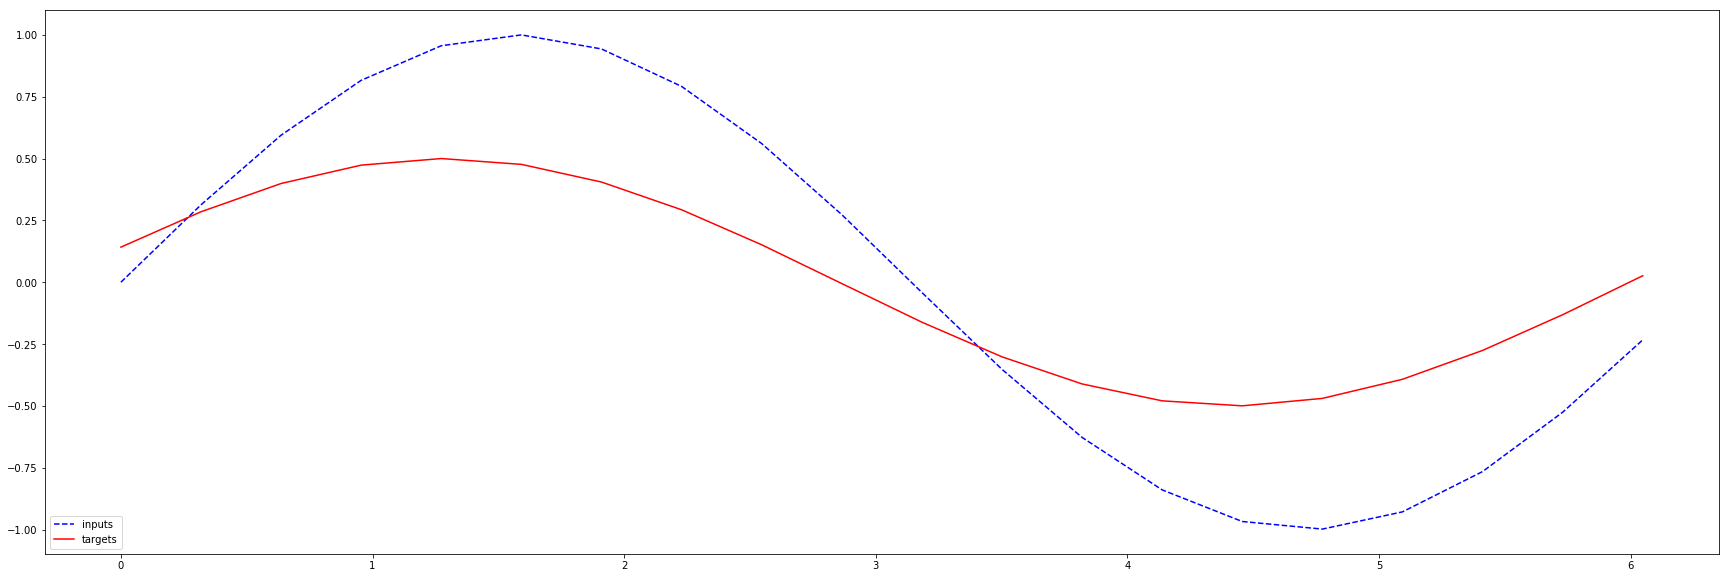

In [4]:
BATCH_START = 0
seq,res,xs = get_batch()
plt.figure(figsize=(30,10))
plt.plot(xs[0,...],seq[0,...],'b--',label="inputs")
plt.plot(xs[0,...],res[0,...],'r',label="targets")
plt.legend(loc="lower left")
plt.show()

In [5]:
network = Sequential()
network.add(LSTM(
    CELL_SIZE,
    batch_input_shape=(BATCH_SIZE,TIME_STEPS,INPUT_SIZE),
    return_sequences=True,
    stateful=True
))
# return_sequences=Ture:每一次都会输出结果，False:只保留最后一个结果输出
# stateful: Batch之间的顺序有没有关系
network.add(TimeDistributed(Dense(OUPUT_SIZE)))

network.compile(optimizer = Adam(LR),loss=tf.losses.mean_squared_error)

layers = network.layers
for i,layer in enumerate(layers):
    print("[{}]:layer {} shape = {}".format(i,layer.name,layer.output.shape))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[0]:layer lstm shape = (64, 20, 40)
[1]:layer time_distributed shape = (64, 20, 1)


In [6]:
plt.switch_backend('Qt5Agg')
#%matplotlib Qt5Agg

train cost =  0.1041548
train cost =  0.026878944
train cost =  0.0033349674
train cost =  0.00043339803
train cost =  2.302609e-05
train cost =  5.076875e-06
train cost =  5.68584e-06
train cost =  4.9790847e-06
train cost =  4.8543707e-06
train cost =  4.730201e-06


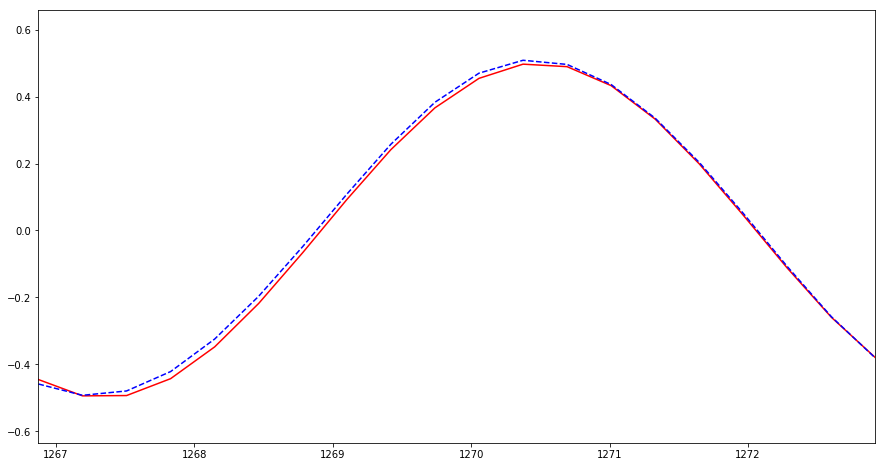

In [7]:
#%matplotlib qt
BATCH_START = 0
plt.figure(figsize=(15,8))
for step in range(200):
    x_batch,y_batch,xs = get_batch()
    cost = network.train_on_batch(x_batch,y_batch)
    pred = network.predict(x_batch,BATCH_SIZE)
    plt.plot(xs[0,...],y_batch[0,...],'r',label="targets")
    plt.plot(xs[0,...],pred[0,...],'b--',label="inputs")
    #plt.legend(loc="lower left")
    plt.xlim(xs[0,0,0],xs[0,-1,-1])
    plt.show()
    plt.pause(0.1)
    if step % 20 == 0:
        print("train cost = ",cost)